In [2]:
#import libraries
import math
from scipy import signal
from PIL import Image
import numpy as np
from numpy import *
from matplotlib import pyplot as plt
from pylab import *
import cv2
import random

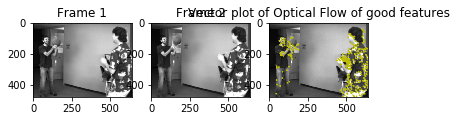

In [4]:
def LK_OpticalFlow(Image1,Image2):
    I1 = np.array(Image1)
    I2 = np.array(Image2)
    S = np.shape(I1)
    I1_smooth = cv2.GaussianBlur(I1, (3,3), 0)
    I2_smooth = cv2.GaussianBlur(I2, (3,3), 0)
    Ix = signal.convolve2d(I1_smooth,[[-0.25,0.25],[-0.25,0.25]],'same') + signal.convolve2d(I2_smooth,[[-0.25,0.25],[-0.25,0.25]],'same')
    Iy = signal.convolve2d(I1_smooth,[[-0.25,-0.25],[0.25,0.25]],'same') + signal.convolve2d(I2_smooth,[[-0.25,-0.25],[0.25,0.25]],'same')
    It = signal.convolve2d(I1_smooth,[[0.25,0.25],[0.25,0.25]],'same') + signal.convolve2d(I2_smooth,[[-0.25,-0.25],[-0.25,-0.25]],'same')
    features = cv2.goodFeaturesToTrack(I1_smooth,10000,0.01,10)
    feature = np.int0(features)
    plt.subplot(1,3,1)
    plt.title('Frame 1')
    plt.imshow(I1_smooth, cmap = cm.gray)
    plt.subplot(1,3,2)
    plt.title('Frame 2')
    plt.imshow(I2_smooth, cmap = cm.gray)
    
    
    for i in feature:
        x,y = i.ravel()
        cv2.circle(I1_smooth,(x,y) ,3 ,0,-1)

    u = v = np.nan*np.ones(S)

    for l in feature:
        j,i = l.ravel()

        IX = ([Ix[i-1,j-1],Ix[i,j-1],Ix[i-1,j-1],Ix[i-1,j],Ix[i,j],Ix[i+1,j],Ix[i-1,j+1],Ix[i,j+1],Ix[i+1,j-1]]) #The x-component of the gradient vector
        IY = ([Iy[i-1,j-1],Iy[i,j-1],Iy[i-1,j-1],Iy[i-1,j],Iy[i,j],Iy[i+1,j],Iy[i-1,j+1],Iy[i,j+1],Iy[i+1,j-1]]) #The Y-component of the gradient vector
        IT = ([It[i-1,j-1],It[i,j-1],It[i-1,j-1],It[i-1,j],It[i,j],It[i+1,j],It[i-1,j+1],It[i,j+1],It[i+1,j-1]]) #The XY-component of the gradient vector

        LK = (IX, IY)
        LK = np.matrix(LK)
        LK_T = np.array(np.matrix(LK)) # transpose of A
        LK = np.array(np.matrix.transpose(LK)) 
        A1 = np.dot(LK_T,LK) #Psedudo Inverse
        A2 = np.linalg.pinv(A1)
        A3 = np.dot(A2,LK_T)
        (u[i,j],v[i,j]) = np.dot(A3,IT) # we have the vectors with minimized square error

    colors = "bgrcmykw"
    color_index = random.randrange(0,8)
    c=colors[color_index]
    plt.subplot(1,3,3)
    plt.title('Vector plot of Optical Flow of good features')
    plt.imshow(I1,cmap = cm.gray)
    for i in range(S[0]):
        for j in range(S[1]):
            if abs(u[i,j])>t or abs(v[i,j])>t: # setting the threshold to plot the vectors
                plt.arrow(j,i,v[i,j],u[i,j],head_width = 5, head_length = 5, color = c)

    plt.show()
    
t = 0.3 # choose threshold value
#import the images
Image1 = Image.open('basketball1.png').convert('L')
Image2 = Image.open('basketball2.png').convert('L')
LK_OpticalFlow(Image1, Image2)
#Image3 = Image.open('grove1.png').convert('L')
#Image4 = Image.open('grove2.png').convert('L')
#LK_OpticalFlow(Image3, Image4)
#Image5 = Image.open('teddy1.png').convert('L')
#Image6 = Image.open('teddy2.png').convert('L')
#LK_OpticalFlow(Image5, Image6)